# Proyek Analisis Data: Bike_sharing_dataset.zip
- **Nama:** Ferdinanta Ginting
- **Email:** ferdinantag8@gmail.com
- **ID Dicoding:** ferdinanta_ginting

## Menentukan Pertanyaan Bisnis

- Hari apa dan jam berapa permintaan sewa sepeda paling tinggi?
- Apakah ada pengaruh kondisi cuaca atau musim terhadap harga sewa sepeda?
- kelompok pengguna mana yang paling banyak memakai jasa sewa sepeda?(Clustering(manual grouping))

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

menampilkan data dengan 5 baris pertama saja

In [3]:
dataDay = pd.read_csv('day.csv')
dataDay.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
dataHour = pd.read_csv('hour.csv')
dataHour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

- Memeriksa apakah data ada yang bernilai null
- Memeriksa apakah ada data yang nilainya duplikat
- Melihat informasi dari dataset berupa informasi jumlah kolom,jumlah baris data,ukuran memory,dan type data

In [5]:
print("Memeriksa data yang null")
print(dataDay.isnull().sum())
print()
print(dataHour.isnull().sum())
print("Memeriksa data duplikat")
print(dataDay.duplicated().sum())
print(dataHour.duplicated().sum())
print("Melihat informasi data")
print(dataDay.info())
print()
print(dataHour.info())

Memeriksa data yang null
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Memeriksa data duplikat
0
0
Melihat informasi data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        7

### Cleaning Data

- mengubah type data pada kolom dteday menjadi date time pada dataset dataDay dan dataHour

In [6]:
dataDay['dteday'] = pd.to_datetime(dataDay['dteday'])
dataDay.info()

dataHour['dteday'] = pd.to_datetime(dataHour['dteday'])
dataHour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore ...

- menampilkan jumlah keseluruhan data dari kolom casual,registered dan cnt yang merupakan gabungan dari jumlah kolom casual dan registered.
- menampilkan jumlah baris kolom hr
- menampilkan jumlah data dari kolom weekday,season dan weathersit.

In [7]:
print(dataDay['casual'].sum())
print(dataDay['registered'].sum())
print(dataDay['cnt'].sum())
print(dataHour['hr'].count())
print(dataDay['weekday'].sum())
print(dataDay['season'].sum())
print(dataDay['weathersit'].sum())

print(dataDay.describe())
print()
print(dataHour.describe())



620017
2672662
3292679
17379
2191
1825
1020
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0

## Visualization & Explanatory Analysis

### Pertanyaan 1:Hari apa dan jam berapa permintaan sewa sepeda paling tinggi?

<ipython-input-19-d2af81d20271>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hr',y='cnt',data=dataHour,palette='bright',errorbar=None,estimator=np.max)


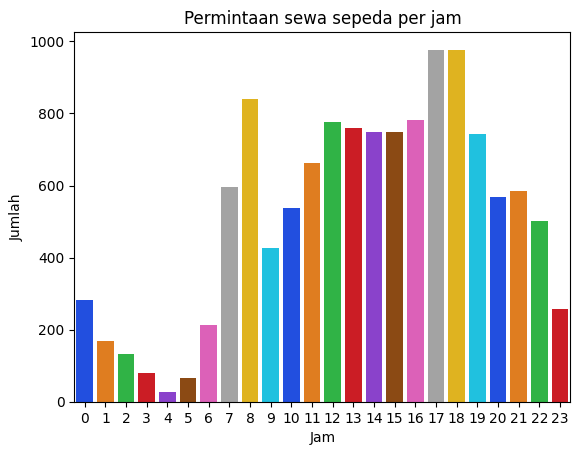

<ipython-input-19-d2af81d20271>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday',y='cnt',data=dataDay,palette='bright',errorbar=None,estimator=np.max)


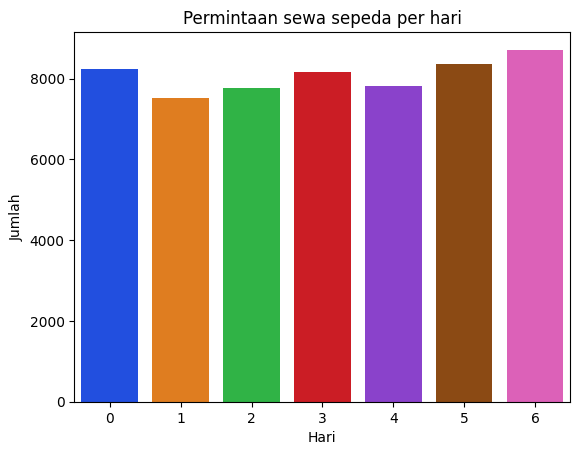

In [19]:
sns.barplot(x='hr',y='cnt',data=dataHour,palette='bright',errorbar=None,estimator=np.max)
plt.title('Permintaan sewa sepeda per jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah')
plt.show()

sns.barplot(x='weekday',y='cnt',data=dataDay,palette='bright',errorbar=None,estimator=np.max)
plt.title('Permintaan sewa sepeda per hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah')
plt.show()

### Pertanyaan 2:Apakah ada pengaruh kondisi cuaca atau musim terhadap permintaan sewa sepeda?

<ipython-input-17-83dfb7a85155>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season',y='cnt',data=dataDay,palette='hls',estimator=np.max,errorbar=None)


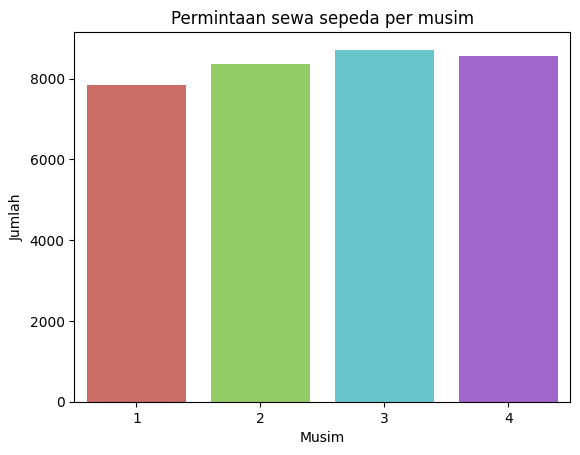

<ipython-input-17-83dfb7a85155>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit',y='cnt',data=dataDay,palette='hls',estimator=np.max,errorbar=None)


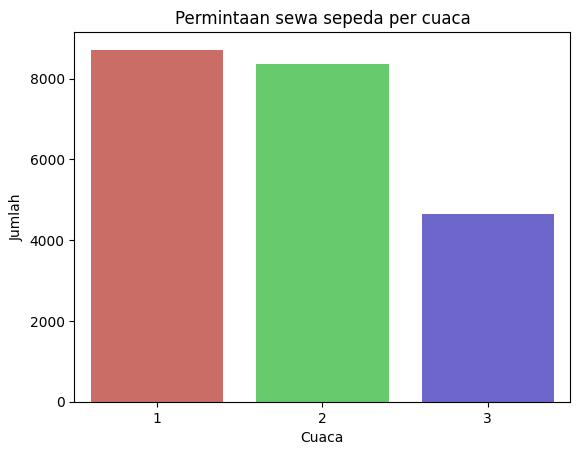

In [17]:
sns.barplot(x='season',y='cnt',data=dataDay,palette='hls',estimator=np.max,errorbar=None)
plt.title('Permintaan sewa sepeda per musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah')
plt.show()

sns.barplot(x='weathersit',y='cnt',data=dataDay,palette='hls',estimator=np.max,errorbar=None)
plt.title('Permintaan sewa sepeda per cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah')
plt.show()

### Pertanyaan 3: kelompok pengguna mana yang paling banyak memakai jasa sewa sepeda?

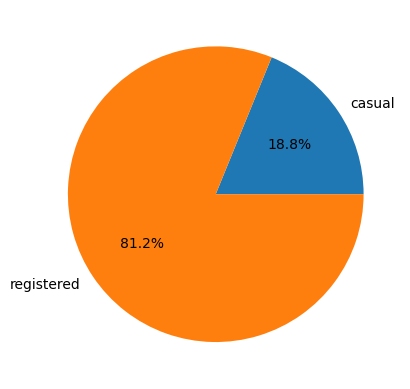

In [ ]:
plt.pie(x=[dataDay['casual'].sum(),dataDay['registered'].sum()],labels=['casual','registered'],autopct='%1.1f%%')
plt.show()

## Conclusion

- Conclution pertanyaan 1


1.   permintaan sewa sepeda paling tinggi berdasarkan jam ada pada jam 17 dan 18 atau jam 5.00 dan jam 6.00 sore dengan jumlah permintaan hampir 1000.
2.   permintaan sewa sepeda paling tinggi berdasarkan hari ada pada hari sabtu dengan jumlah permintaan lebih dari 800.


- Conclution pertanyaan 2
#### Terdapat pengaruh kondisi cuaca atau musim untuk permintaan sewa sepeda dapat kita lihat bahwa permintaan tinggi pada Musim gugur dan cuaca cerah sedangkan pada cuaca yang bersalju tidak ada permintaan.

- Conclution pertanyaan 3
#### kelompok pengguna yang paling banyak memakai jasa sewa sepeda adalah pengguna terdaftar dengan persentasi 81.2%
